# Detecting Vandalism on Wikipedia

Wikipedia is a free online encyclopedia that anyone can edit and contribute to. It is available in many languages and is growing all the time. On the English language version of Wikipedia:

- There are currently 4.7 million pages.
- There have been a total over 760 million edits (also called revisions) over its lifetime.
- There are approximately 130,000 edits per day.

One of the consequences of being editable by anyone is that some people vandalize pages. This can take the form of removing content, adding promotional or inappropriate content, or more subtle shifts that change the meaning of the article. With this many articles and edits per day it is difficult for humans to detect all instances of vandalism and revert (undo) them. As a result, Wikipedia uses bots - computer programs that automatically revert edits that look like vandalism. In this assignment we will attempt to develop a vandalism detector that uses machine learning to distinguish between a valid edit and vandalism.

The data for this problem is based on the revision history of the page Language. Wikipedia provides a history for each page that consists of the state of the page at each revision. Rather than manually considering each revision, a script was run that checked whether edits stayed or were reverted. If a change was eventually reverted then that revision is marked as vandalism. This may result in some misclassifications, but the script performs well enough for our needs.

As a result of this preprocessing, some common processing tasks have already been done, including lower-casing and punctuation removal. The columns in the dataset are:

- Vandal = 1 if this edit was vandalism, 0 if not.
- Minor = 1 if the user marked this edit as a "minor edit", 0 if not.
- Loggedin = 1 if the user made this edit while using a Wikipedia account, 0 if they did not.
- Added = The unique words added.
- Removed = The unique words removed.

Notice the repeated use of unique. The data we have available is not the traditional bag of words - rather it is the set of words that were removed or added. For example, if a word was removed multiple times in a revision it will only appear one time in the "Removed" column.

## Bags of Words

In [42]:
wiki = read.csv('./dataset/wiki.csv', stringsAsFactors = FALSE, encoding='UTF-8')
wiki$Vandal = as.factor(wiki$Vandal)

In [43]:
summary(wiki)

      X.1             X        Vandal       Minor           Loggedin     
 Min.   :   1   Min.   :   1   0:2061   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:1001   1st Qu.:1184   1:1815   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :2016   Median :2318            Median :0.0000   Median :1.0000  
 Mean   :2040   Mean   :2322            Mean   :0.2853   Mean   :0.6659  
 3rd Qu.:3069   3rd Qu.:3467            3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :4135   Max.   :4639            Max.   :1.0000   Max.   :1.0000  
    Added             Removed         
 Length:3876        Length:3876       
 Class :character   Class :character  
 Mode  :character   Mode  :character  
                                      
                                      
                                      

We will now use the bag of words approach to build a model. We have two columns of textual data, with different meanings. For example, adding rude words has a different meaning to removing rude words. We'll start like we did in class by building a document term matrix from the Added column. The text already is lowercase and stripped of punctuation. So to pre-process the data, just complete the following four steps:

1) Create the corpus for the Added column, and call it "corpusAdded".

2) Remove the English-language stopwords.

3) Stem the words.

4) Build the DocumentTermMatrix, and call it dtmAdded.

In [44]:
library("tm")
library("SnowballC")

In [45]:
# Create corpus
corpus = VCorpus(VectorSource(wiki$Added))

# Look at corpus
corpus
corpus[[1]]$content

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 3876

[1] "  represent psycholinguisticspsycholinguistics orthographyorthography help text all actions through human ethnologue relationships linguistics regarded writing languages to other listing xmlspacepreservelanguages metaverse formal term philology common each including phonologyphonology often ten list humans affiliation see computer are speechpathologyspeech our what for ways dialects please artificial written body be of quite hypothesis found alone refers by about language profanity study programming priorities rosenfelders technologytechnologies makes or first among useful languagephilosophy one sounds use area create phrases mark their genetic basic families complete but sapirwhorfhypothesissapirwhorf with talklanguagetalk population animals this science up vocal can concepts called at and topics locations as numbers have in pathology different develop 4000 things ideas grouped complex animal mathematics fairly literature httpwwwzompistcom philosophy most important meaningful a historicallinguisticsorphilologyhistorical semanticssemantics patterns the oral"

In [46]:
# Remove the English-language Stopwords
corpus = tm_map(corpus, removeWords, stopwords("english"))

In [47]:
# Stem the words
corpus = tm_map(corpus, stemDocument)

In [48]:
dtmAdded = DocumentTermMatrix(corpus)

In [49]:
dtmAdded

<<DocumentTermMatrix (documents: 3876, terms: 6675)>>
Non-/sparse entries: 15368/25856932
Sparsity           : 100%
Maximal term length: 784
Weighting          : term frequency (tf)

In [50]:
sparseAdded = removeSparseTerms(dtmAdded, 0.997)
sparseAdded

<<DocumentTermMatrix (documents: 3876, terms: 166)>>
Non-/sparse entries: 2681/640735
Sparsity           : 100%
Maximal term length: 28
Weighting          : term frequency (tf)

Convert sparseAdded to a data frame called wordsAdded, and then prepend all the words with the letter A, by using the command:
```R
colnames(wordsAdded) = paste("A", colnames(wordsAdded))
```

In [51]:
wordsAdded = as.data.frame(as.matrix(sparseAdded))
colnames(wordsAdded) = paste("A", colnames(wordsAdded))

In [52]:
wordsAdded

,A accord,A actual,A ago,A agre,A analog,A appar,A arbitrari,A believ,A biolog,A biologyanalog,...,A utter,A verb,A want,A wide,A will,A work,A write,A writer,A xmlspacepreserveotheruses4th,A year
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now repeat all of the steps we've done so far (create a corpus, remove stop words, stem the document, create a sparse document term matrix, and convert it to a data frame) to create a Removed bag-of-words dataframe, called wordsRemoved, except this time, prepend all of the words with the letter R:
```R
colnames(wordsRemoved) = paste("R", colnames(wordsRemoved))
```

In [53]:
# Create corpus
corpus = VCorpus(VectorSource(wiki$Removed))

# Look at corpus
corpus
corpus[[1]]$content

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 3876

[1] " "

In [54]:
# Remove the English-language Stopwords
corpus = tm_map(corpus, removeWords, stopwords("english"))

# Stem the words
corpus = tm_map(corpus, stemDocument)

In [55]:
dtmRemoved = DocumentTermMatrix(corpus)
sparseRemoved = removeSparseTerms(dtmRemoved, 0.997)
wordsRemoved = as.data.frame(as.matrix(sparseRemoved))
colnames(wordsRemoved) = paste("A", colnames(wordsRemoved))

In [56]:
wordsRemoved

,A 2000000,A 40000,A accord,A actual,A ago,A agre,A analog,A appar,A arbitrari,A believ,...,A unit,A use,A verb,A want,A wide,A will,A work,A writer,A xmlspacepreserveotheruses4th,A year
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Combine the two data frames into a data frame called wikiWords with the following line of code:
```R
wikiWords = cbind(wordsAdded, wordsRemoved)
```
The cbind function combines two sets of variables for the same observations into one data frame. Then add the Vandal column (HINT: remember how we added the dependent variable back into our data frame in the Twitter lecture). Set the random seed to 123 and then split the data set using sample.split from the "caTools" package to put 70% in the training set.

In [57]:
wikiWords = cbind(wordsAdded, wordsRemoved)

In [58]:
colnames(wikiWords) = make.names(colnames(wikiWords))

In [59]:
wikiWords$Vandal = wiki$Vandal

In [60]:
str(wikiWords)

'data.frame':	3876 obs. of  329 variables:
 $ A.accord                      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ A.actual                      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ A.ago                         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ A.agre                        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ A.analog                      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ A.appar                       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ A.arbitrari                   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ A.believ                      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ A.biolog                      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ A.biologyanalog               : num  0 0 0 0 0 0 0 0 0 0 ...
 $ A.bodi                        : num  1 0 0 0 1 0 0 0 0 0 ...
 $ A.call                        : num  1 0 0 0 1 0 0 0 0 0 ...
 $ A.clear                       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ A.close                       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ A.combin                      : num  0 0 0 0 0 0 0 0 0 0 .

In [61]:
library("caTools")

In [62]:
set.seed(123)

In [63]:
split = sample.split(wikiWords$Vandal, SplitRatio=0.7)
train = subset(wikiWords, split == TRUE)
test =subset(wikiWords, split == FALSE)

In [64]:
table(test$Vandal)


  0   1 
618 545 

In [65]:
baseline_acc = (618) / nrow(test)
baseline_acc

[1] 0.5313844

Build a CART model to predict Vandal, using all of the other variables as independent variables. Use the training set to build the model and the default parameters (don't set values for minbucket or cp).

In [66]:
library("rpart")
library("rpart.plot")

In [67]:
wikiCART = rpart(Vandal ~ ., data=train, method='class')

In [68]:
predCART = predict(wikiCART, newdata=test, type='class')

In [69]:
table(test$Vandal, predCART)

   predCART
      0   1
  0 618   0
  1 533  12

In [70]:
CART_acc = (618 + 12) / nrow(test)
CART_acc

[1] 0.5417025

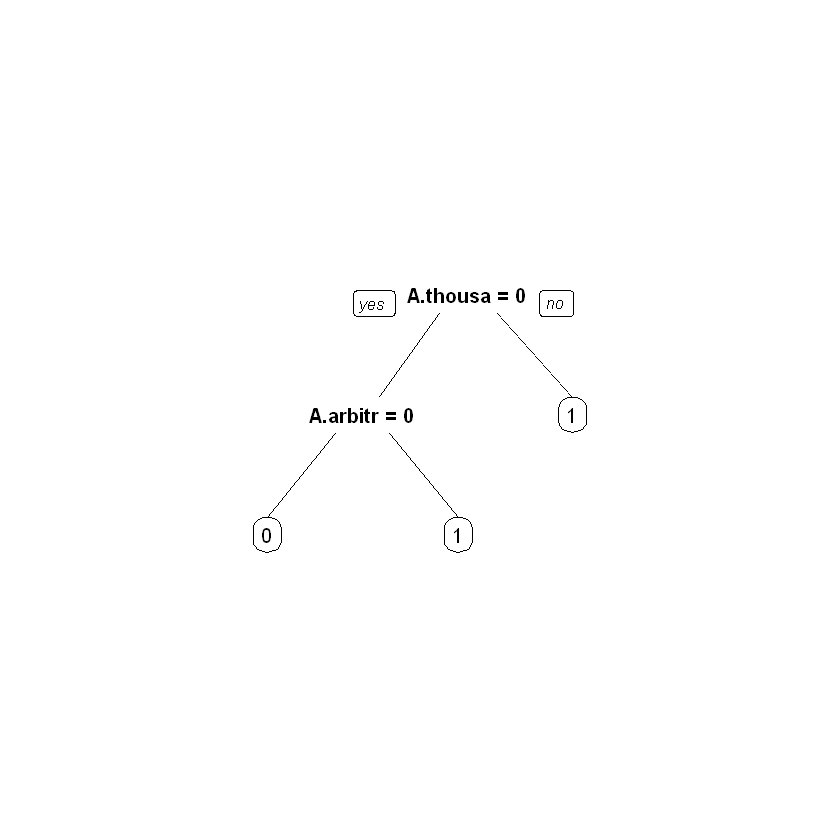

In [71]:
prp(wikiCART)

## Problem-specific Knowledge

We weren't able to improve on the baseline using the raw textual information. More specifically, the words themselves were not useful. There are other options though, and in this section we will try two techniques - identifying a key class of words, and counting words.

The key class of words we will use are website addresses. "Website addresses" (also known as URLs - Uniform Resource Locators) are comprised of two main parts. An example would be "http://www.google.com ". The first part is the protocol, which is usually "http" (HyperText Transfer Protocol). The second part is the address of the site, e.g. "www.google.com ". We have stripped all punctuation so links to websites appear in the data as one word, e.g. "httpwwwgooglecom". We hypothesize that given that a lot of vandalism seems to be adding links to promotional or irrelevant websites, the presence of a web address is a sign of vandalism.

We can search for the presence of a web address in the words added by searching for "http" in the Added column. The grepl function returns TRUE if a string is found in another string, e.g.
```R
grepl("cat","dogs and cats",fixed=TRUE) # TRUE

grepl("cat","dogs and rats",fixed=TRUE) # FALSE
```
Create a copy of your dataframe from the previous question:
```R
wikiWords2 = wikiWords
```
Make a new column in wikiWords2 that is 1 if "http" was in Added:
```
wikiWords2$HTTP = ifelse(grepl("http",wiki$Added,fixed=TRUE), 1, 0)
```

In [72]:
wikiWords2 = wikiWords
wikiWords2$HTTP = ifelse(grepl("http", wiki$Added, fixed=TRUE), 1, 0)

In [77]:
table(wikiWords2$HTTP)


   0    1 
3659  217 

you computed a vector called "split" that identified the observations to put in the training and testing sets. Use that variable (do not recompute it with sample.split) to make new training and testing sets:
```R
wikiTrain2 = subset(wikiWords2, split==TRUE)

wikiTest2 = subset(wikiWords2, split==FALSE)
```
Then create a new CART model using this new variable as one of the independent variables.

In [79]:
wikiTrain2 = subset(wikiWords2, split == TRUE)
wikiTest2 = subset(wikiWords2, split == FALSE)

In [80]:
wikiCART2 = rpart(Vandal ~ ., data=wikiTrain2, method='class')

In [81]:
predCART2 = predict(wikiCART2, newdata=wikiTest2, type='class')

In [82]:
table(wikiTest2$Vandal, predCART2)

   predCART2
      0   1
  0 609   9
  1 488  57

In [83]:
CART2_acc = (609 + 57) / nrow(test)
CART2_acc

[1] 0.5726569

Another possibility is that the number of words added and removed is predictive, perhaps more so than the actual words themselves. We already have a word count available in the form of the document-term matrices (DTMs).

Sum the rows of dtmAdded and dtmRemoved and add them as new variables in your data frame wikiWords2 (called NumWordsAdded and NumWordsRemoved) by using the following commands:
```R
wikiWords2$NumWordsAdded = rowSums(as.matrix(dtmAdded))

wikiWords2$NumWordsRemoved = rowSums(as.matrix(dtmRemoved))
```

In [84]:
wikiWords2$NumWordsAdded = rowSums(as.matrix(dtmAdded))
wikiWords2$NumWordsRemoved = rowSums(as.matrix(dtmRemoved))

In [86]:
summary(wikiWords2$NumWordsAdded)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.00    1.00    4.05    3.00  259.00 

In [87]:
wikiTrain2 = subset(wikiWords2, split == TRUE)
wikiTest2 = subset(wikiWords2, split == FALSE)

wikiCART3 = rpart(Vandal ~ ., data=wikiTrain2, method='class')
predCART3 = predict(wikiCART3, newdata=wikiTest2, type='class')

In [88]:
table(wikiTest2$Vandal, predCART3)

   predCART3
      0   1
  0 514 104
  1 297 248

In [89]:
CART3_acc = (514 + 248) /nrow(test)
CART3_acc

[1] 0.6552021

## Using Non-Textual Data

We have two pieces of "metadata" (data about data) that we haven't yet used. Make a copy of wikiWords2, and call it wikiWords3:
```R
wikiWords3 = wikiWords2
```
Then add the two original variables Minor and Loggedin to this new data frame:
```
wikiWords3$Minor = wiki$Minor

wikiWords3$Loggedin = wiki$Loggedin
```

In [90]:
wikiWords3 = wikiWords2

wikiWords3$Minor = wiki$Minor
wikiWords3$Loggedin = wiki$Loggedin

you computed a vector called "split" that identified the observations to put in the training and testing sets. Use that variable (do not recompute it with sample.split) to make new training and testing sets with wikiWords3.

In [91]:
wikiTrain3 = subset(wikiWords3, split == TRUE)
wikiTest3 = subset(wikiWords3, split == FALSE)

wikiCART4 = rpart(Vandal ~ ., data=wikiTrain3, method='class')
predCART4 = predict(wikiCART4, newdata=wikiTest3, type='class')
table(wikiTest3$Vandal, predCART4)

   predCART4
      0   1
  0 595  23
  1 304 241

In [92]:
CART4_acc = (595 + 241) / nrow(wikiTest3)
CART4_acc

[1] 0.7188306

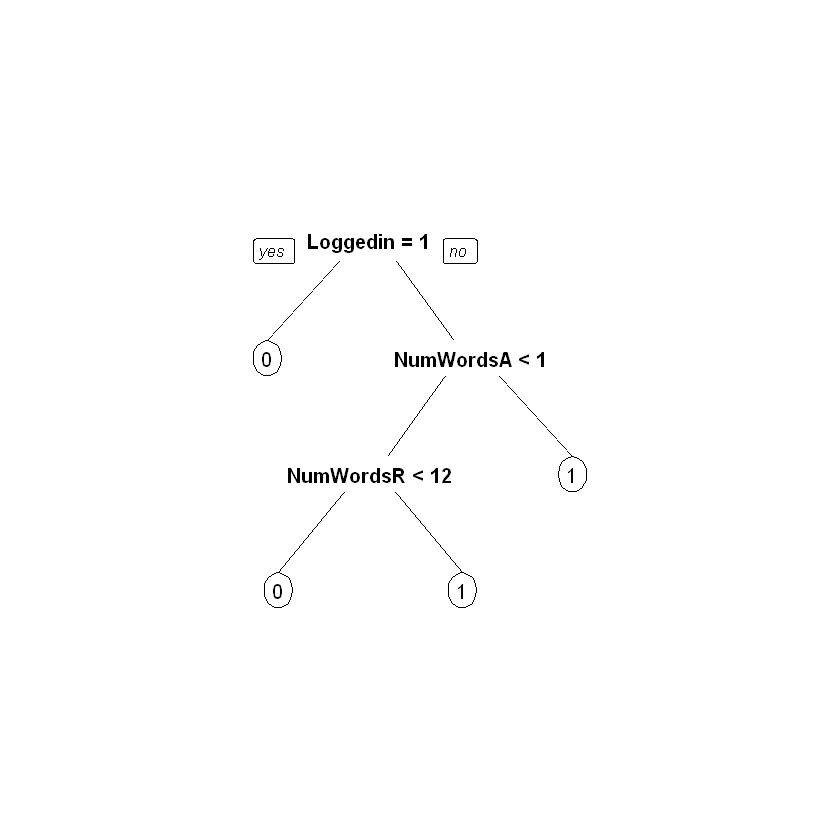

In [93]:
prp(wikiCART4)